Data from https://www.kaggle.com/blastchar/telco-customer-churn

In [3]:
import pandas as pd
from rich.jupyter import print
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt


%load_ext rich

In [4]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


 # 3.2 Preparing the dataset

In [5]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)

In [7]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

string_columns = list(df.dtypes[df.dtypes == "object"].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [8]:
df.churn = (df.churn == "yes").astype(int)
df.churn


0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

# 3.3 Setting up the validation framework 
- Perform the train/validation/split with Scikit-Learn
- https://www.analyticsvidhya.com/blog/2023/11/train-test-validation-split/#:~:text=To%20perform%20a%20train%2Dtest,distribution%20of%20classes%20or%20outcomes.

In [9]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


In [12]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [13]:
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

# 3.4 Exploratory Data Analysis (EDA)
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [14]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [15]:
df_full_train.isnull().sum()
# so we have no missing data, only `totalcharges` had missing data and we have already eliminated it by fillna(0)


customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
df_full_train.churn.value_counts()


churn
0    4113
1    1521
Name: count, dtype: int64

In [17]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

np.float64(0.27)

In [18]:
df_full_train.dtypes


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [19]:
categorical = [
    "gender",
    "seniorcitizen",
    "partner",
    "dependents",
    "phoneservice",
    "multiplelines",
    "internetservice",
    "onlinesecurity",
    "onlinebackup",
    "deviceprotection",
    "techsupport",
    "streamingtv",
    "streamingmovies",
    "contract",
    "paperlessbilling",
    "paymentmethod",
]
numerical = ["tenure", "monthlycharges", "totalcharges"]

In [20]:
df_full_train[categorical].nunique()


gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio
Feature important analysis (part od EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information - later
  

In [21]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [22]:
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

np.float64(0.27682403433476394)

In [23]:
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

np.float64(0.2632135306553911)

In [24]:
global_churn = df_full_train.churn.mean()
global_churn

np.float64(0.26996805111821087)

In [25]:
churn_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_partner

np.float64(0.20503330866025166)

In [26]:
churn_partner / global_churn

np.float64(0.7594724924338315)

In [27]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner

np.float64(0.3298090040927694)

In [28]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

### Risk ratio, > 1 , more likely to churn, < 1 less likely to churn

```mysql
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

NB: there is no direct way to do this in pandas, we have to do it manually


In [29]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn
    df_group["risk"] = df_group["mean"] / global_churn
    display(df_group)

gender

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


seniorcitizen

,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


partner

,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


dependents

,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


phoneservice

,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


multiplelines

,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


internetservice

,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


onlinesecurity

,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


onlinebackup

,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


deviceprotection

,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


techsupport

,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


streamingtv

,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


streamingmovies

,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


contract

,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


paperlessbilling

,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


paymentmethod

,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


# 3.6 Feature importance: Mutual information
Mutual information - concept from information theory , it tells is how much we can learn about one variable if we know the value of another.

- [A Deep Conceptual Guide to Mutual Information](https://medium.com/swlh/a-deep-conceptual-guide-to-mutual-information-a5021031fad0)


In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mutual_info_score(labels_true=df_full_train.contract, labels_pred=df_full_train.churn)

np.float64(0.0983203874041556)

In [32]:
mutual_info_score(labels_true=df_full_train.gender, labels_pred=df_full_train.churn)

np.float64(0.0001174846211139946)

In [33]:
def mutual_info_churn_score(series):
    return mutual_info_score(labels_true=series, labels_pred=df_full_train.churn)

In [34]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)


contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

# 3.7 Feature importance :Correlation
How about numerical columns?
- Correlation coefficient
- [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)
- -1 <r < 1, r>0 is negative correlation while r>0 is positive correlation


In [35]:
df_full_train[numerical].corrwith(df_full_train.churn).to_frame("correlation")

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [36]:
df_full_train.groupby(by="churn")[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


# 3.8 One-hot encoding
- Use Scikit-Learn to encode categorical features
- [What Is One Hot Encoding and How to Implement It in Python](https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial)
- [DictVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) , [OneHotEncoder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [37]:
from sklearn.feature_extraction import DictVectorizer

In [38]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15
1,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55
2,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65
3,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10
4,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55
4221,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80
4222,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05
4223,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95


In [90]:
df_train[categorical + numerical]

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,tenure,monthlycharges,totalcharges
0,female,0,yes,yes,yes,yes,fiber_optic,yes,yes,yes,yes,yes,yes,two_year,yes,electronic_check,72,115.50,8425.15
1,male,0,no,no,yes,yes,fiber_optic,no,yes,yes,no,no,yes,month-to-month,yes,electronic_check,10,95.25,1021.55
2,female,0,no,no,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,no,electronic_check,5,75.55,413.65
3,female,0,yes,yes,yes,no,fiber_optic,no,no,no,no,yes,no,month-to-month,yes,electronic_check,5,80.85,356.10
4,female,0,yes,no,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,18,20.10,370.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,male,1,yes,yes,yes,yes,dsl,no,yes,yes,no,yes,yes,one_year,yes,electronic_check,52,80.85,4079.55
4221,male,0,no,no,no,no_phone_service,dsl,no,no,no,no,no,no,month-to-month,no,mailed_check,18,25.15,476.80
4222,male,0,yes,yes,yes,no,fiber_optic,no,no,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),2,90.00,190.05
4223,female,0,yes,yes,yes,yes,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,27,24.50,761.95


In [39]:
train_dict = df_train[categorical + numerical].to_dict(orient="records")

In [40]:
train_dict[0]


{
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'yes',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'yes',
    'onlinebackup': 'yes',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'two_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 72,
    'monthlycharges': 115.5,
    'totalcharges': 8425.15
}

In [41]:
dv = DictVectorizer(sparse=False)

In [42]:
# dv.fit(train_dicts)
# X_train = dv.transform(train_dicts)
X_train = dv.fit_transform(train_dict)
X_train.shape

(4225, 45)

In [43]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service'

# 3.9 Logistic regression
- Binary classification
- Linear vs Logistic regression

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [45]:
z = np.linspace(-5, 5, 51)

In [46]:
sigmoid(z)


array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

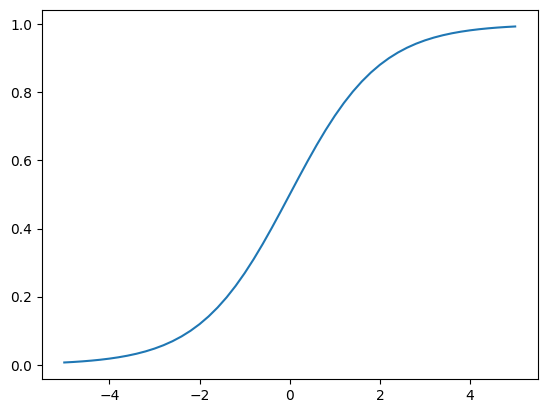

In [47]:
plt.plot(z, sigmoid(z))

In [48]:
def liner_regression(xi):
    result = w0
    for j in range(len(w)):
        result += xi[j] * w[j]
    return result

In [49]:
def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score += xi[j] * w[j]
    return sigmoid(score)

# 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(solver="liblinear", random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

We don't fit the val dataset, we only transform


In [52]:
val_dict = df_val[categorical + numerical].to_dict(orient="records")
X_val = dv.transform(val_dict)
X_val.shape

(1409, 45)

## Hard prediction


In [91]:
model.predict(X_val)

array([0, 0, 0, ..., 0, 1, 1])

In [55]:
model.intercept_[0]

np.float64(-0.12193448146460852)

In [56]:
model.coef_[0].round(3)


array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

# Soft prediction

In [57]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred


array([0.00735888, 0.2097209 , 0.2207079 , ..., 0.14887969, 0.78483927,
       0.81058075])

In [58]:
churn_decision = y_pred > 0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [59]:
df_pred = pd.DataFrame()
df_pred["probability"] = y_pred
df_pred["prediction"] = churn_decision.astype(int)
df_pred["actual"] = y_val
df_pred

,probability,prediction,actual
0,0.007359,0,0
1,0.209721,0,0
2,0.220708,0,0
3,0.575035,1,1
4,0.216671,0,0
...,...,...,...
1404,0.295302,0,0
1405,0.040019,0,1
1406,0.148880,0,0
1407,0.784839,1,1


In [60]:
(y_val == churn_decision).mean()

np.float64(0.8055358410220014)

# 3.11 Model Interpretation
- Look at the coefficients
- Train a smaller model with fewer features

In [61]:
model.intercept_[0]

np.float64(-0.12193448146460852)

In [62]:
dv.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service'

In [63]:
model.coef_[0].round(3)


array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [64]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))


{
    'contract=month-to-month': np.float64(0.607),
    'contract=one_year': np.float64(-0.058),
    'contract=two_year': np.float64(-0.671),
    'dependents=no': np.float64(-0.028),
    'dependents=yes': np.float64(-0.094),
    'deviceprotection=no': np.float64(0.052),
    'deviceprotection=no_internet_service': np.float64(-0.103),
    'deviceprotection=yes': np.float64(-0.071),
    'gender=female': np.float64(-0.042),
    'gender=male': np.float64(-0.08),
    'internetservice=dsl': np.float64(-0.376),
    'internetservice=fiber_optic': np.float64(0.357),
    'internetservice=no': np.float64(-0.103),
    'monthlycharges': np.float64(0.002),
    'multiplelines=no': np.float64(-0.248),
    'multiplelines=no_phone_service': np.float64(0.133),
    'multiplelines=yes': np.float64(-0.008),
    'onlinebackup=no': np.float64(0.057),
    'onlinebackup=no_internet_service': np.float64(-0.103),
    'onlinebackup=yes': np.float64(-0.076),
    'onlinesecurity=no': np.float64(0.217),
    'onlinese

In [65]:
subset = ["contract", "tenure", "monthlycharges"]
df_train[subset].iloc[:10].to_dict(orient="records")


[
    {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
    {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
    {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
    {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
    {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
    {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
    {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
    {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
    {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
    {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}
]

In [66]:
dicts_train_small = df_train[subset].to_dict(orient="records")
dicts_val_small = df_val[subset].to_dict(orient="records")

In [67]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [68]:
dv_small.get_feature_names_out()


array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [69]:
X_train_small = dv_small.transform(dicts_train_small)

In [70]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [71]:
w0 = model_small.intercept_[0]
w0

np.float64(-2.477957595790743)

In [72]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [73]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))


{
    'contract=month-to-month': np.float64(0.971),
    'contract=one_year': np.float64(-0.024),
    'contract=two_year': np.float64(-0.948),
    'monthlycharges': np.float64(0.027),
    'tenure': np.float64(-0.036)
}

In [74]:
-2.47 + 0.97 + 60 * 0.027 + 5 * (-0.036)

-0.06000000000000033

In [75]:
sigmoid(_)

np.float64(0.48500449838058984)

# 3.12 Using the Model

In [76]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient="records")

In [77]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [78]:
y_full_train = df_full_train.churn.values
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

In [79]:
model = LogisticRegression(max_iter=10000000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=10000000)

In [80]:
dicts_test = df_test[categorical + numerical].to_dict(orient="records")

In [81]:
X_test = dv.transform(dicts_test)

In [82]:
y_pred = model.predict_proba(X_test)[:, 1]

In [83]:
churn_decision = y_pred >= 0.5

In [84]:
(churn_decision == y_test).mean()

np.float64(0.8119233498935415)

In [85]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [86]:
customer = dicts_test[-1]
customer


{
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'yes',
    'dependents': 'yes',
    'phoneservice': 'yes',
    'multiplelines': 'yes',
    'internetservice': 'fiber_optic',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'no',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'month-to-month',
    'paperlessbilling': 'yes',
    'paymentmethod': 'electronic_check',
    'tenure': 17,
    'monthlycharges': 104.2,
    'totalcharges': 1743.5
}

In [87]:
X_small = dv.transform([customer])

In [88]:
model.predict_proba(X_small)[0, 1]

np.float64(0.6400990960201914)

In [89]:
y_test[-1]

np.int64(1)

# 3.13 Summary